# Basic classification: Classify images of clothing (trying to solve overfitting)

This example is an extended version of the TensorFlow guide (https://www.tensorflow.org/tutorials/keras/classification).

We will see how to train a neural network model to classify images of clothing, like sneakers and shirts. It's okay if you don't understand all the details; this is a fast-paced overview of a complete TensorFlow program with the details explained as you go.

This guide uses [tf.keras](https://www.tensorflow.org/guide/keras), a high-level API to build and train models in TensorFlow.

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


## Import the Fashion MNIST dataset

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (validation_images, validation_labels)b = fashion_mnist.load_data()

In [12]:
validation_images = test_images[:9000,]
validation_labels = test_labels[:9000,]
test_images = test_images[9000:,]
test_labels = test_labels[9000:,]

In [13]:
train_images = train_images/train_images.max()
validation_images = validation_images/validation_images.max()
test_images = test_images/test_images.max()

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
def plot_some_inputs(input, labels):
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(input[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

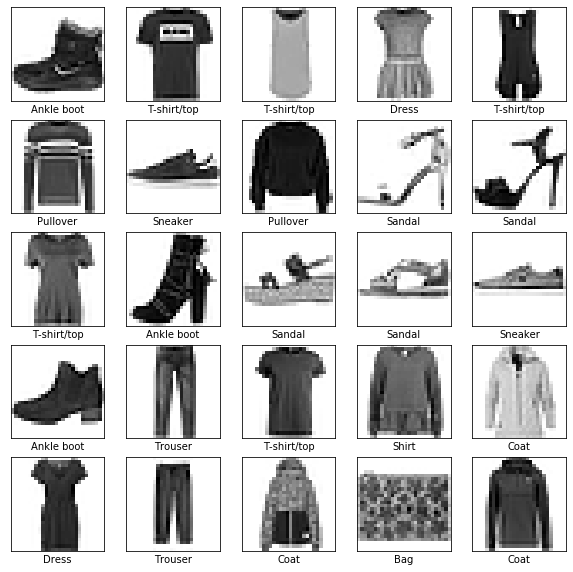

In [9]:
plot_some_inputs(train_images, train_labels)

In [10]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [11]:
def plot_training(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.clf()
    
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

# Overfitting

In the plots above, the training accuracy is increasing constantly over time, whereas validation accuracy stalls around 85% in the training process. Also, the difference in accuracy between training and validation accuracy is noticeable a sign of overfitting.
When there are a small number of training examples, the model sometimes learns from noises or unwanted details from training examples to an extent that it negatively impacts the performance of the model on new examples. This phenomenon is known as overfitting. It means that the model will have a difficult time generalizing on a new dataset.

There are multiple ways to fight overfitting in the training process. In this tutorial, you'll use data augmentation and add dropout to our model.

## Data augmentation

In [14]:
train_images = train_images.reshape(train_images.shape +(1,))
train_images = train_images.astype('float32')
validation_images = np.concatenate((validation_images, test_images), axis=0)
validation_labels = np.concatenate((validation_labels, test_labels), axis=0)
validation_images = validation_images.reshape(validation_images.shape[0], 28, 28, 1)
validation_images = validation_images.astype('float32')

In [15]:
validation_images.shape

(10000, 28, 28, 1)

In [16]:
validation_labels.shape

(10000,)

In [18]:
gen = keras.preprocessing.image.ImageDataGenerator(
                    rotation_range=20,
                    width_shift_range=.1,
                    height_shift_range=.1,
                    horizontal_flip=True,
                    zoom_range=0.1
                    )

In [19]:
training_set = gen.flow(train_images, train_labels)
validation_set = gen.flow(validation_images, validation_labels)

In [20]:
training_set[0][0].shape

(32, 28, 28, 1)

In [21]:
training_set[0][1].shape

(32,)

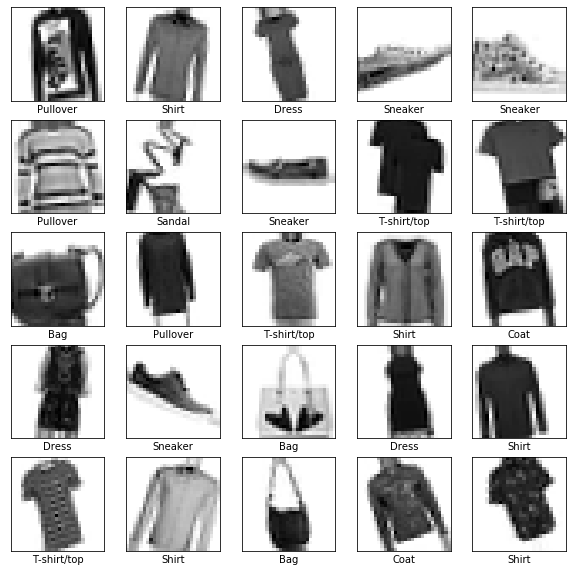

In [22]:
plot_some_inputs(training_set[0][0][:,:,:,0], training_set[0][1])

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

In [23]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28,1)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [24]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [26]:
epochs = 10
history2 = model2.fit(training_set, 
                    epochs=epochs,
                    validation_data=validation_set)

Train for 1875 steps, validate for 313 steps
Epoch 1/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.8842 - accuracy: 0.6749 - val_loss: 0.7826 - val_accuracy: 0.7029
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.7205 - accuracy: 0.7298 - val_loss: 0.7008 - val_accuracy: 0.7370
Epoch 3/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.6695 - accuracy: 0.7482 - val_loss: 0.6818 - val_accuracy: 0.7448
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.6437 - accuracy: 0.7569 - val_loss: 0.6707 - val_accuracy: 0.7491
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.6218 - accuracy: 0.7656 - val_loss: 0.6345 - val_accuracy: 0.7569
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.6059 - accuracy: 0.7731 - val_loss: 0.6180 - val_accuracy: 0.7663
Epoch 7/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.

<Figure size 432x288 with 0 Axes>

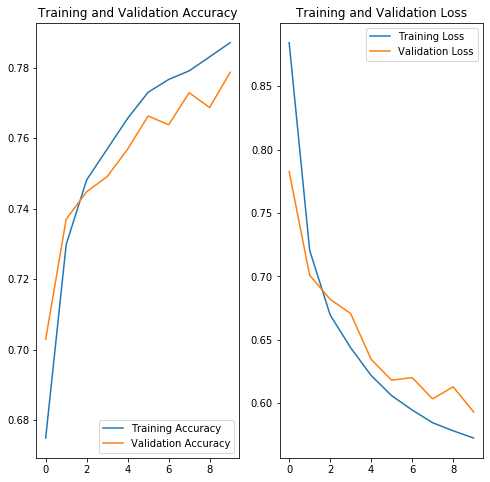

In [27]:
plot_training(history2)

## Dropout

Dropout is one of the most effective and most commonly used regularization techniques for neural networks, developed by Hinton and his students at the University of Toronto. Dropout, applied to a layer, consists of randomly "dropping out" (i.e. set to zero) a number of output features of the layer during training. Let's say a given layer would normally have returned a vector [0.2, 0.5, 1.3, 0.8, 1.1] for a given input sample during training; after applying dropout, this vector will have a few zero entries distributed at random, e.g. [0, 0.5, 1.3, 0, 1.1]. The "dropout rate" is the fraction of the features that are being zeroed-out; it is usually set between 0.2 and 0.5. At test time, no units are dropped out, and instead the layer's output values are scaled down by a factor equal to the dropout rate, so as to balance for the fact that more units are active than at training time.

In `tf.keras` you can introduce dropout in a network via the Dropout layer, which gets applied to the output of layer right before.

## Weight regularization

You may be familiar with Occam's Razor principle: given two explanations for something, the explanation most likely to be correct is the "simplest" one, the one that makes the least amount of assumptions. This also applies to the models learned by neural networks: given some training data and a network architecture, there are multiple sets of weights values (multiple models) that could explain the data, and simpler models are less likely to overfit than complex ones.

A "simple model" in this context is a model where the distribution of parameter values has less entropy (or a model with fewer parameters altogether, as we saw in the section above). Thus a common way to mitigate overfitting is to put constraints on the complexity of a network by forcing its weights only to take small values, which makes the distribution of weight values more "regular". This is called "weight regularization", and it is done by adding to the loss function of the network a cost associated with having large weights. This cost comes in two flavors:

* (L1 regularization)[https://developers.google.com/machine-learning/glossary/#L1_regularization], where the cost added is proportional to the absolute value of the weights coefficients (i.e. to what is called the "L1 norm" of the weights).

* (L2 regularization)[https://developers.google.com/machine-learning/glossary/#L2_regularization], where the cost added is proportional to the square of the value of the weights coefficients (i.e. to what is called the squared "L2 norm" of the weights). L2 regularization is also called weight decay in the context of neural networks. Don't let the different name confuse you: weight decay is mathematically the exact same as L2 regularization.

L1 regularization introduces sparsity to make some of your weight parameters zero. L2 regularization will penalize the weights parameters without making them sparse—one reason why L2 is more common.

In `tf.keras`, weight regularization is added by passing weight regularizer instances to layers as keyword arguments. Let's add L2 weight regularization now.

In [52]:
model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28,1)),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(10, activation='softmax')
])

In [53]:
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [54]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [55]:
history3 = model3.fit(training_set, 
                    epochs=epochs,
                    validation_data=validation_set)


Train for 1875 steps, validate for 313 steps
Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 1.0721 - accuracy: 0.6510 - val_loss: 0.9026 - val_accuracy: 0.7035
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.8870 - accuracy: 0.7031 - val_loss: 0.8428 - val_accuracy: 0.7196
Epoch 3/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.8582 - accuracy: 0.7098 - val_loss: 0.8219 - val_accuracy: 0.7258
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.8350 - accuracy: 0.7173 - val_loss: 0.8462 - val_accuracy: 0.7197
Epoch 5/10
1875/1875 [==============================] - 4104s 2s/step - loss: 0.8262 - accuracy: 0.7217 - val_loss: 0.8034 - val_accuracy: 0.7260
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.8201 - accuracy: 0.7218 - val_loss: 0.8098 - val_accuracy: 0.7303
Epoch 7/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.8

<Figure size 432x288 with 0 Axes>

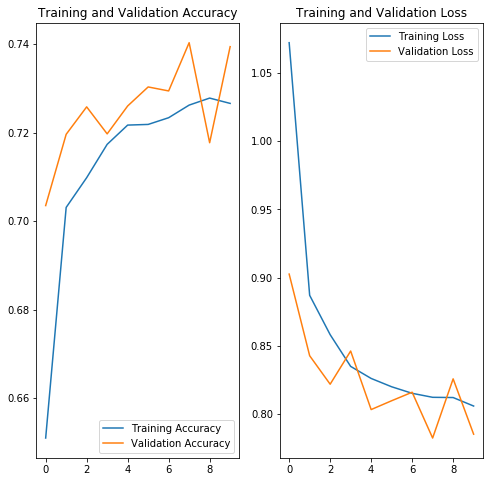

In [56]:
plot_training(history3)

dropout is activated when evaluating the performances on training set but deactivated when evaluating on the validation set

In [ ]:
test_loss, test_acc = model3.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

## Adding a new layer

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
________________________________________________

<Figure size 432x288 with 0 Axes>

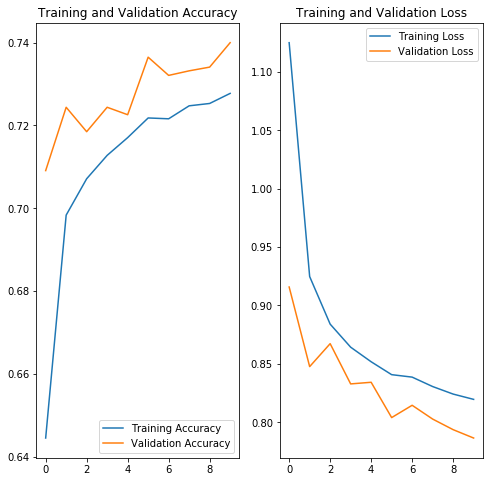

In [57]:
model4 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28,1)),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(10, activation='softmax')
])

model4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model4.summary()

history4 = model4.fit(training_set, 
                    epochs=epochs,
                    validation_data=validation_set)


plot_training(history4)

# A Convolutional block

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 128)       1280      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                589888    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

<Figure size 432x288 with 0 Axes>

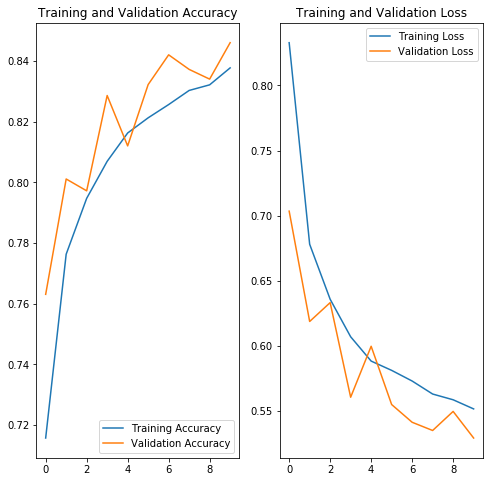

In [29]:
model5 = keras.Sequential([
    keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(10, activation='softmax')
])

model5.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model5.summary()

history5 = model5.fit(training_set, 
                    epochs=epochs,
                    validation_data=validation_set)


plot_training(history5)